<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Viz" data-toc-modified-id="Viz-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Viz</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#OOB:-Out-of-Bag" data-toc-modified-id="OOB:-Out-of-Bag-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>OOB: Out of Bag</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Plotting-the-Tree" data-toc-modified-id="Plotting-the-Tree-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plotting the Tree</a></span></li><li><span><a href="#Variable-Importance" data-toc-modified-id="Variable-Importance-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Variable Importance</a></span></li></ul></div>

# XGBoost

Credit: 

In [15]:
import warnings
warnings.filterwarnings("always")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import xgboost as xgb

# python version 
import sys
print('python vers:', sys.version[:31])

python vers: 3.6.5 |Anaconda custom (64-bit)


## Load Data

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

data['PRICE'] = boston.target

data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
# Separate the target variable and rest of the variables
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [5]:
# convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data=X,label=y)
data_dmatrix

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [16]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


In [8]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.868649


## Cross Validation

In [10]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.749371,0.033853,21.746693,0.019311
1,19.859423,0.029633,19.891096,0.053295
2,18.072169,0.018803,18.168509,0.014465
3,16.570206,0.018556,16.687861,0.037342
4,15.206344,0.015451,15.365013,0.059400


In [11]:
print((cv_results["test-rmse-mean"]).tail(1))

49    4.031162
Name: test-rmse-mean, dtype: float64


## Viz

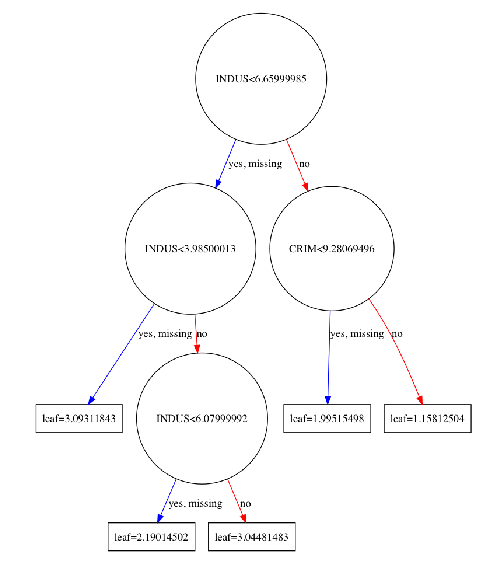

In [13]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

## Feature Importance

In [14]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()